# Classification: MAGIC

Dataset: Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWdith", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "FDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWdith   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     FDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [15]:
df["class"] = (df["class"] == "g").astype(int)

In [17]:
df.head()

fLength    fWdith   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     FDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

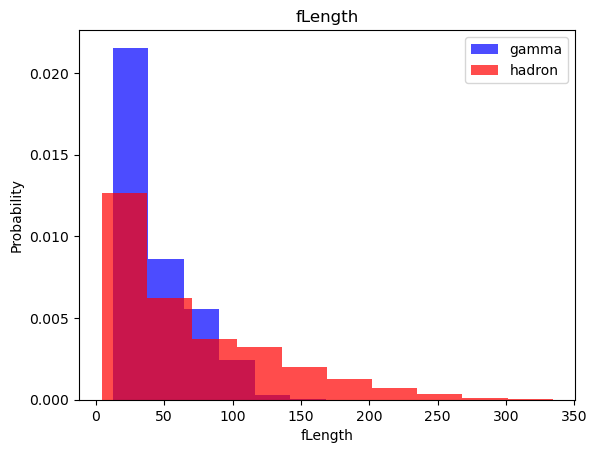

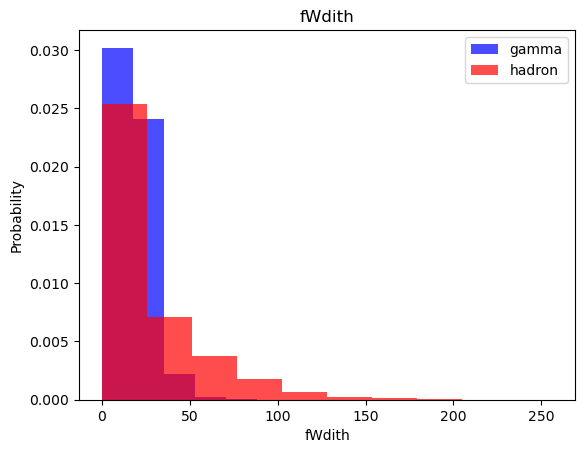

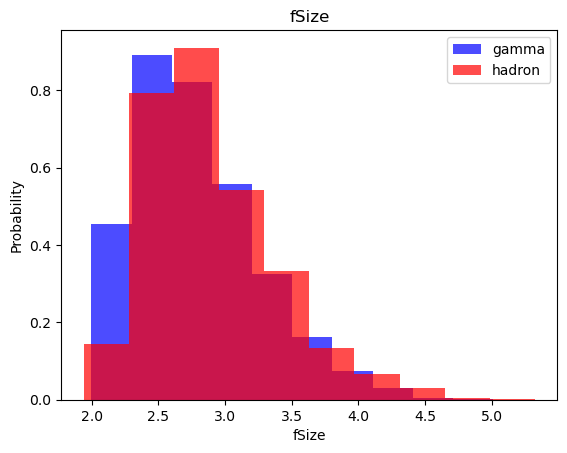

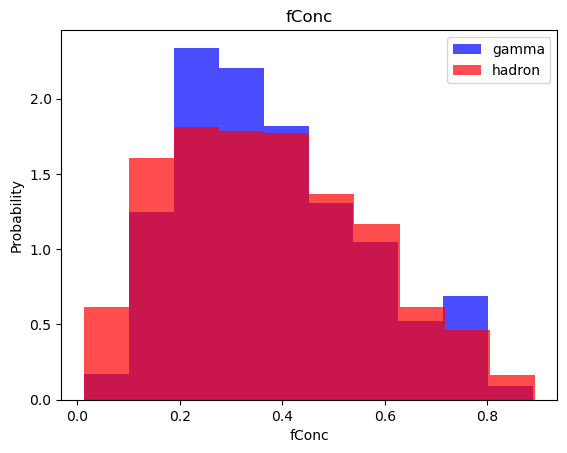

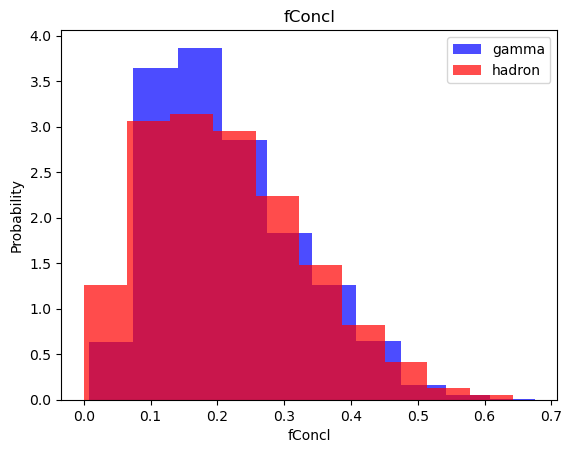

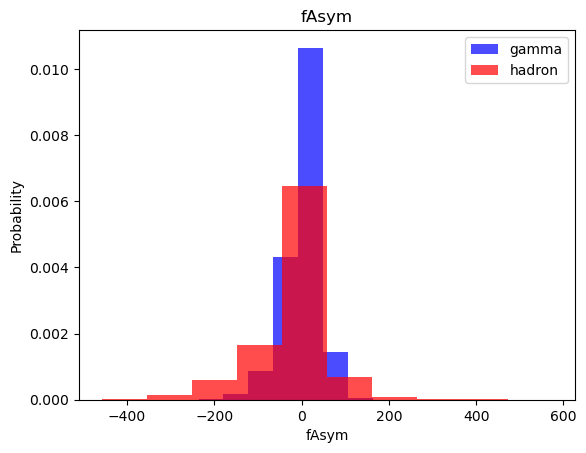

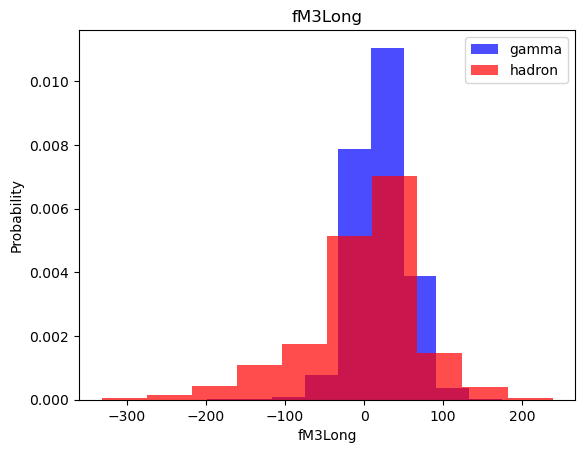

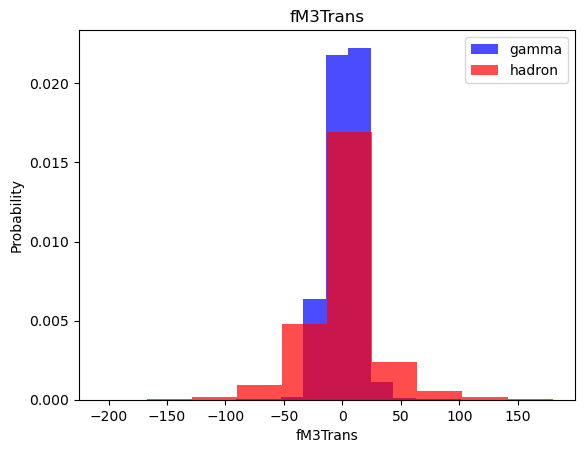

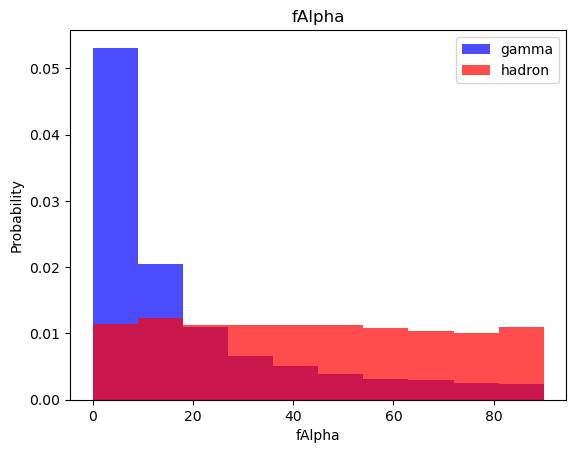

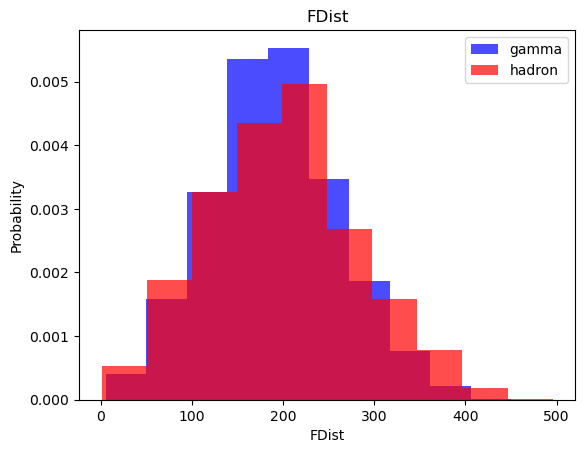

In [23]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, validation, test datasets

In [69]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\emily\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [73]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

## kNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [100]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [115]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1319
           1       0.86      0.86      0.86      2485

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

In [119]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [121]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1319
           1       0.74      0.89      0.81      2485

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [127]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [129]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1319
           1       0.85      0.83      0.84      2485

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.80      0.79      0.79      3804



## SVM

In [146]:
from sklearn.svm import SVC

In [147]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [148]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1319
           1       0.89      0.90      0.89      2485

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Net

In [160]:
import tensorflow as tf

In [184]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.Input(shape=(10,)),  
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history    

num_nodes 16, dropout_prob 0, lr 0.1, batch_size 32


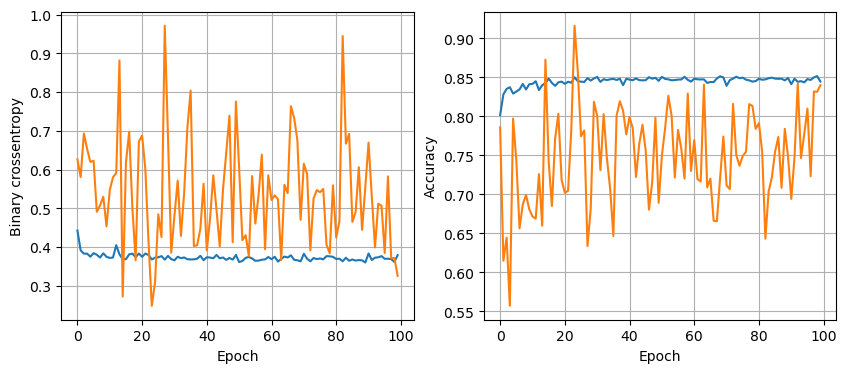

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8344 - loss: 0.4017
num_nodes 16, dropout_prob 0, lr 0.1, batch_size 64


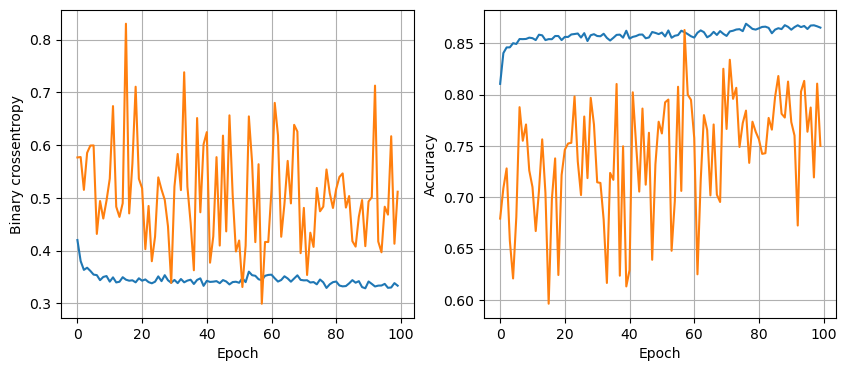

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8736 - loss: 0.3319
num_nodes 16, dropout_prob 0, lr 0.1, batch_size 128


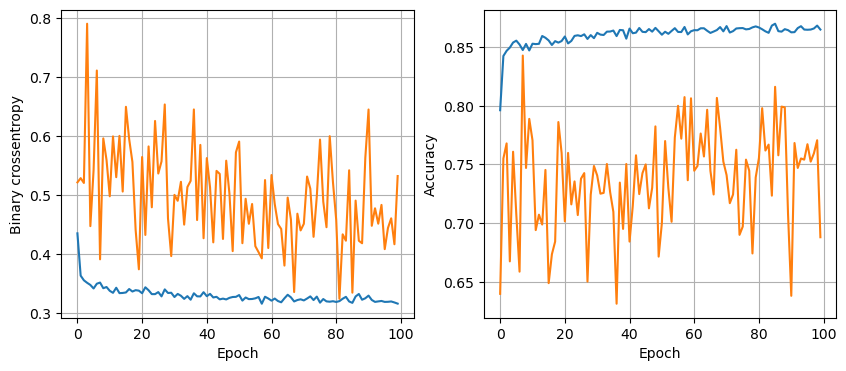

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3267
num_nodes 16, dropout_prob 0, lr 0.005, batch_size 32


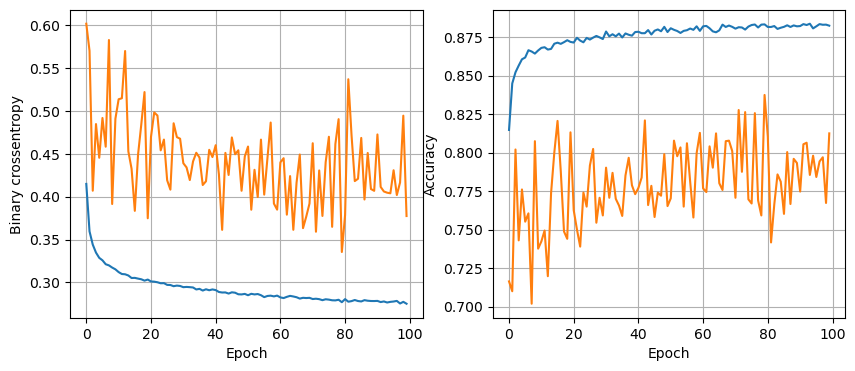

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3199
num_nodes 16, dropout_prob 0, lr 0.005, batch_size 64


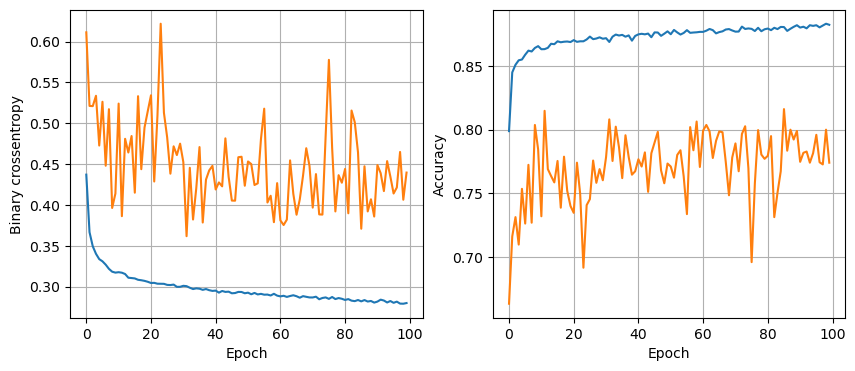

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.2987
num_nodes 16, dropout_prob 0, lr 0.005, batch_size 128


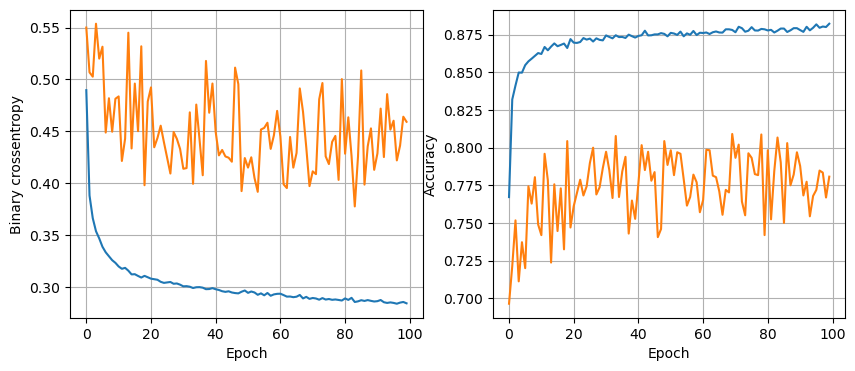

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.3109
num_nodes 16, dropout_prob 0, lr 0.001, batch_size 32


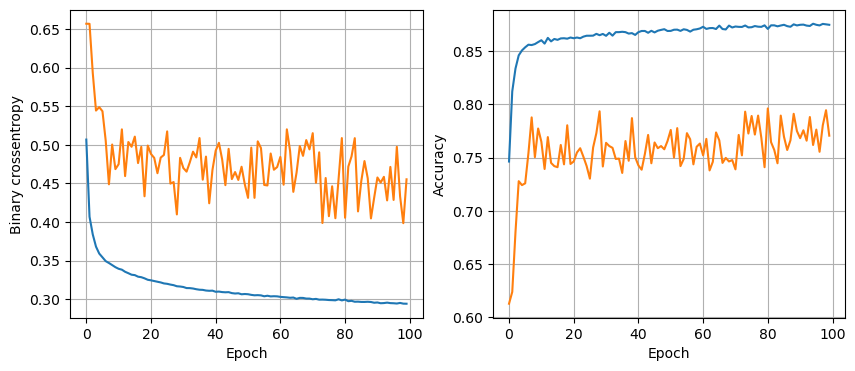

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3114
num_nodes 16, dropout_prob 0, lr 0.001, batch_size 64


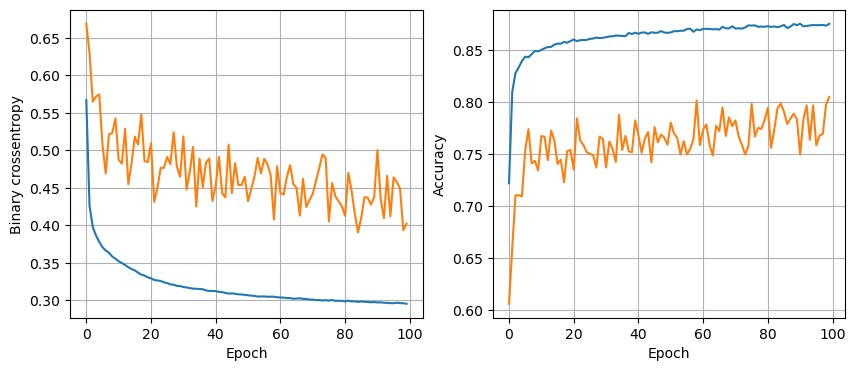

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3118
num_nodes 16, dropout_prob 0, lr 0.001, batch_size 128


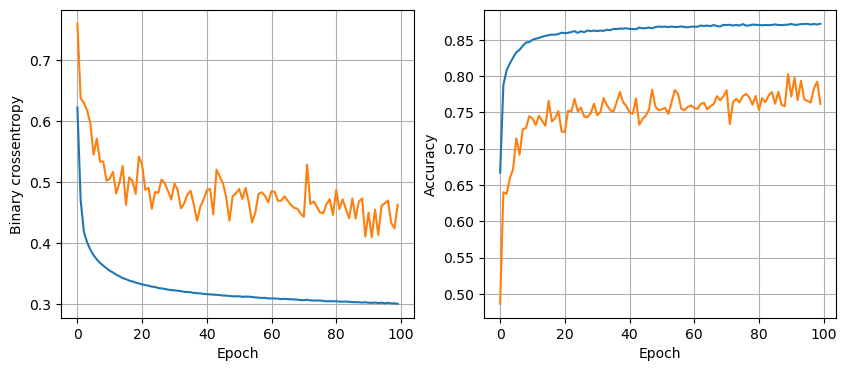

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8741 - loss: 0.3067
num_nodes 16, dropout_prob 0.2, lr 0.1, batch_size 32


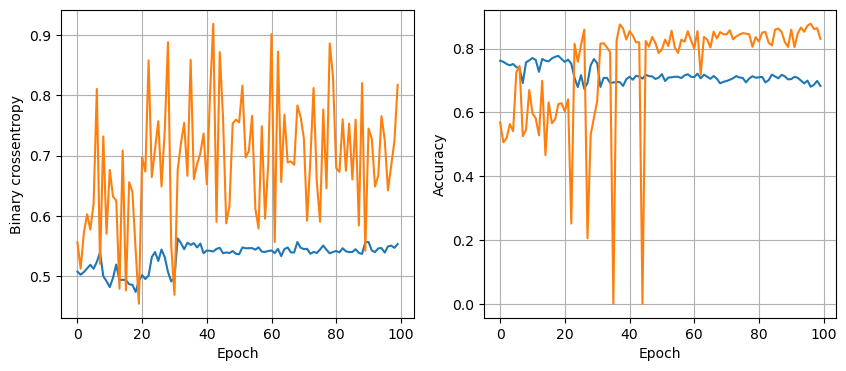

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.4888
num_nodes 16, dropout_prob 0.2, lr 0.1, batch_size 64


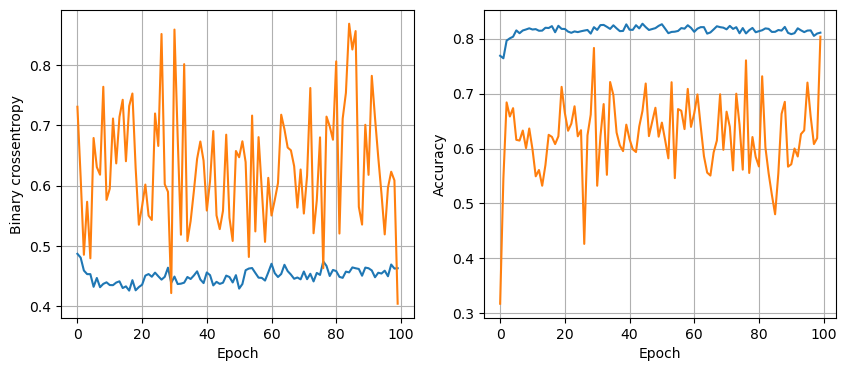

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7855 - loss: 0.5828
num_nodes 16, dropout_prob 0.2, lr 0.1, batch_size 128


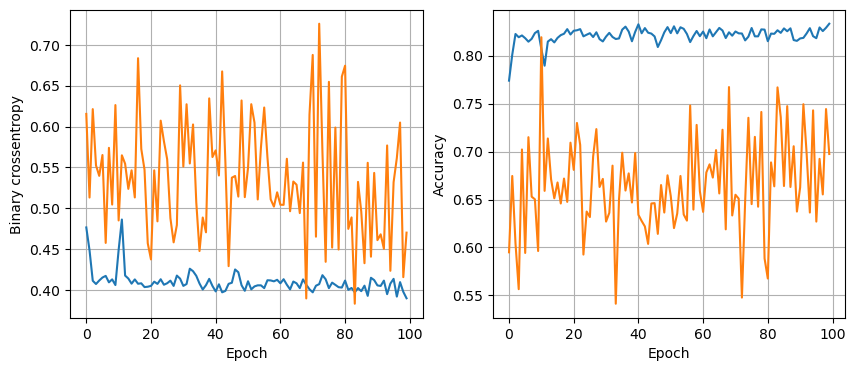

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.3480
num_nodes 16, dropout_prob 0.2, lr 0.005, batch_size 32


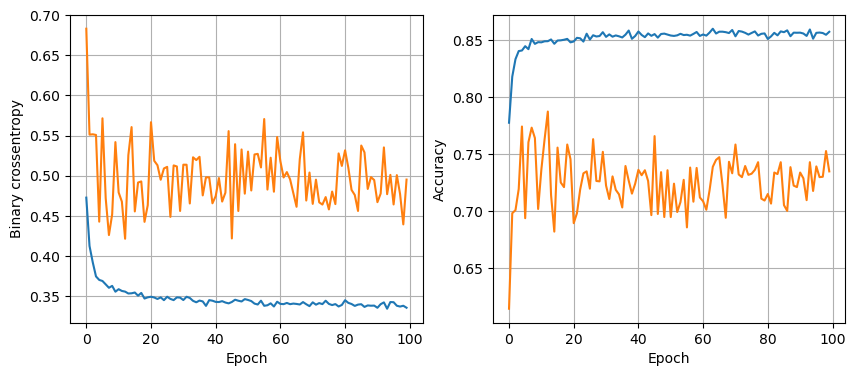

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.3065
num_nodes 16, dropout_prob 0.2, lr 0.005, batch_size 64


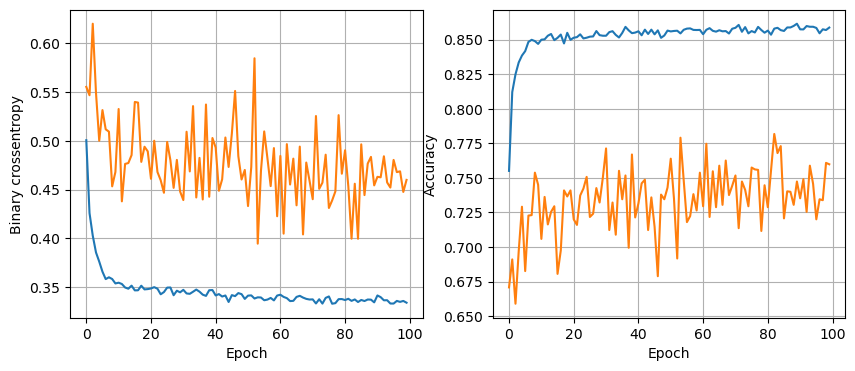

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8746 - loss: 0.3100
num_nodes 16, dropout_prob 0.2, lr 0.005, batch_size 128


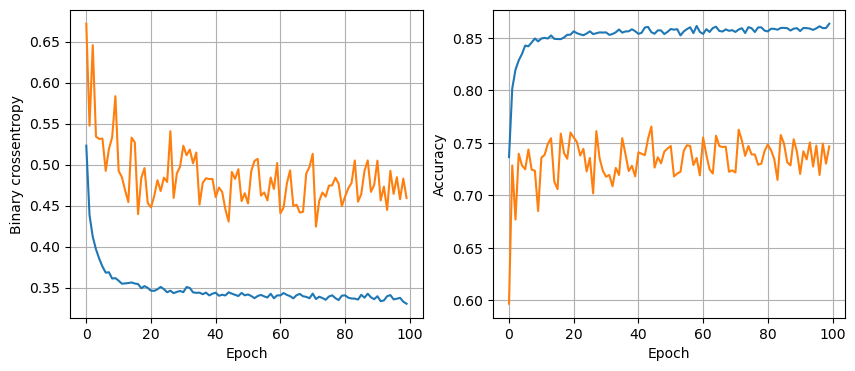

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8759 - loss: 0.3080
num_nodes 16, dropout_prob 0.2, lr 0.001, batch_size 32


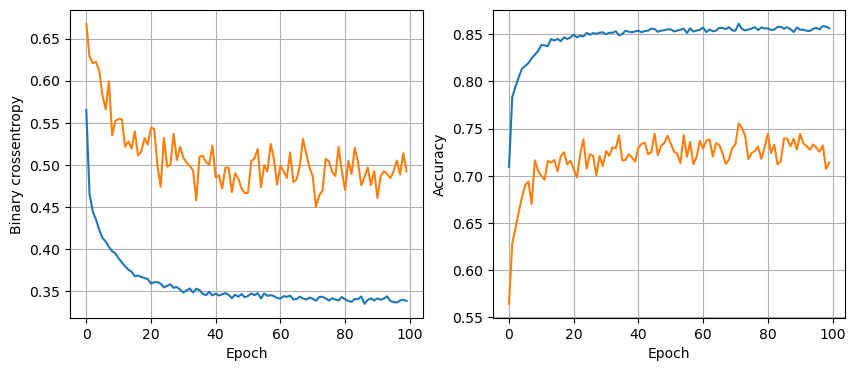

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8678 - loss: 0.3171
num_nodes 16, dropout_prob 0.2, lr 0.001, batch_size 64


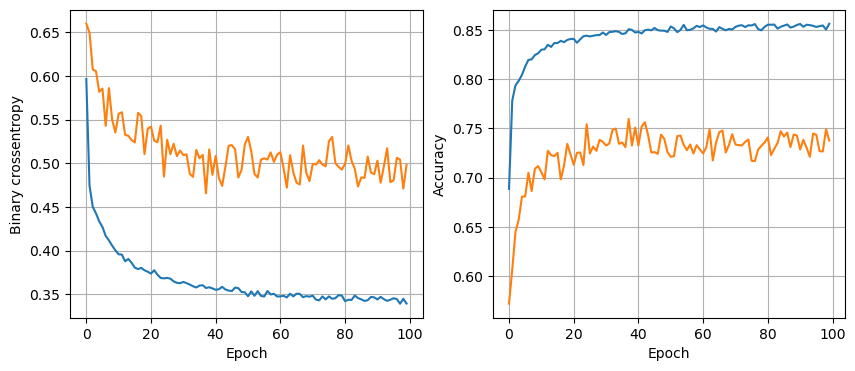

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8728 - loss: 0.3106
num_nodes 16, dropout_prob 0.2, lr 0.001, batch_size 128


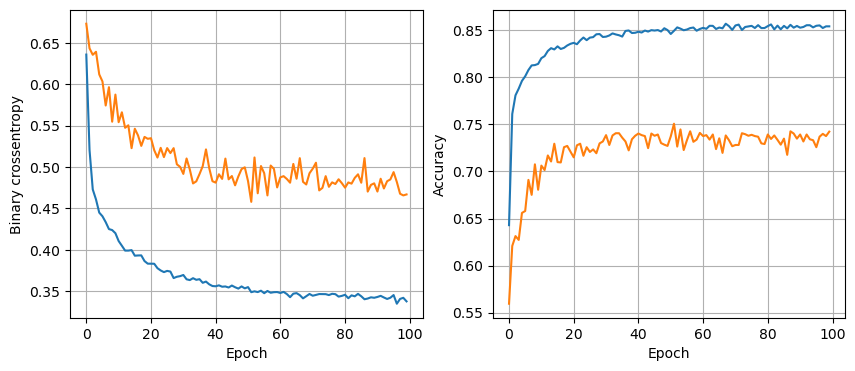

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8712 - loss: 0.3122
num_nodes 32, dropout_prob 0, lr 0.1, batch_size 32


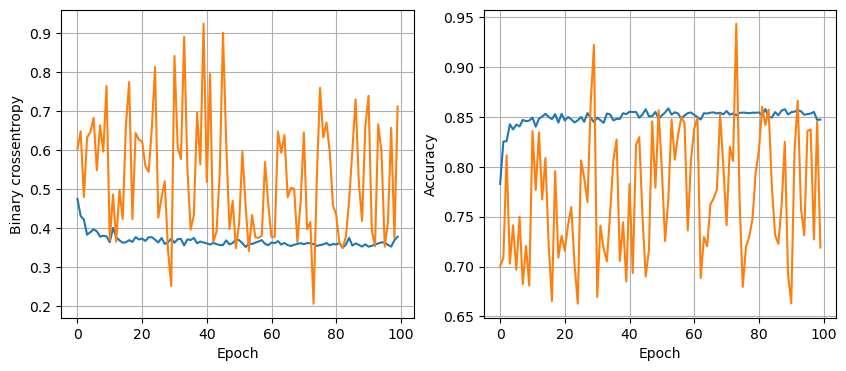

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.3698
num_nodes 32, dropout_prob 0, lr 0.1, batch_size 64


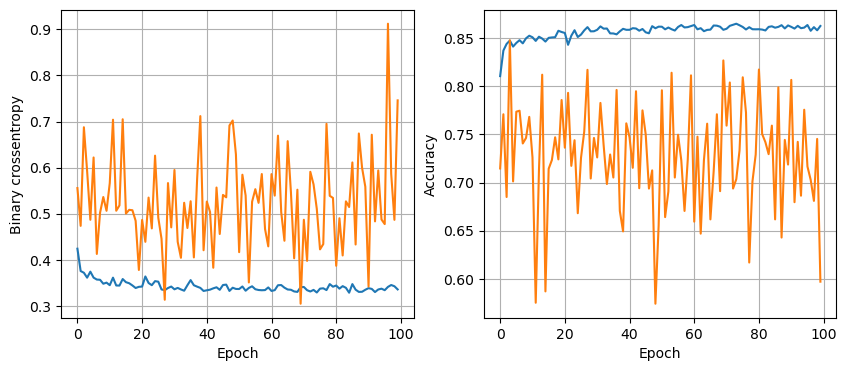

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8407 - loss: 0.3717
num_nodes 32, dropout_prob 0, lr 0.1, batch_size 128


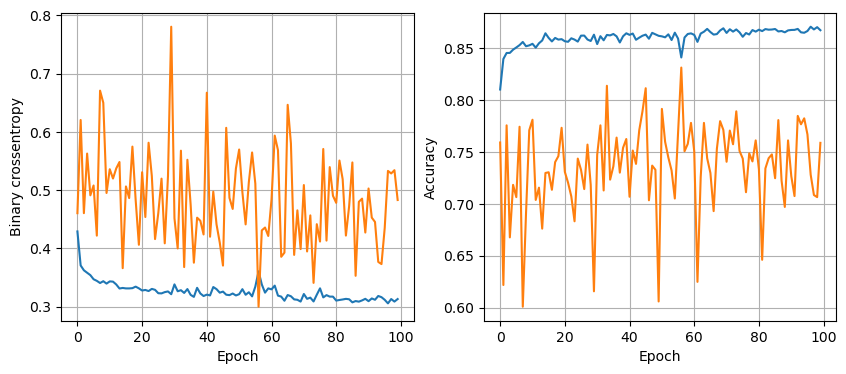

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8701 - loss: 0.3236
num_nodes 32, dropout_prob 0, lr 0.005, batch_size 32


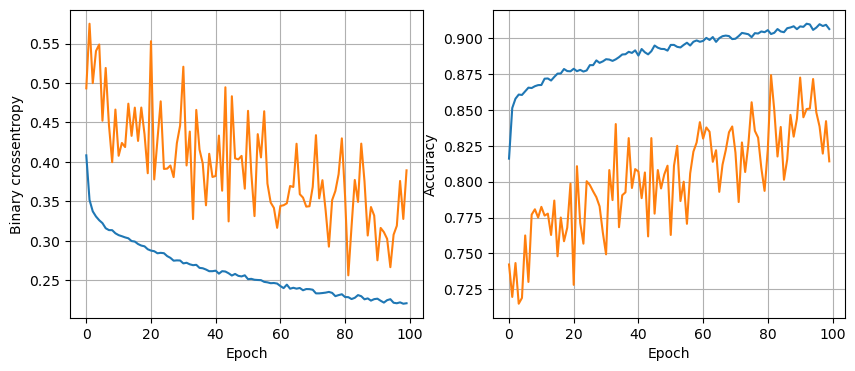

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3948
num_nodes 32, dropout_prob 0, lr 0.005, batch_size 64


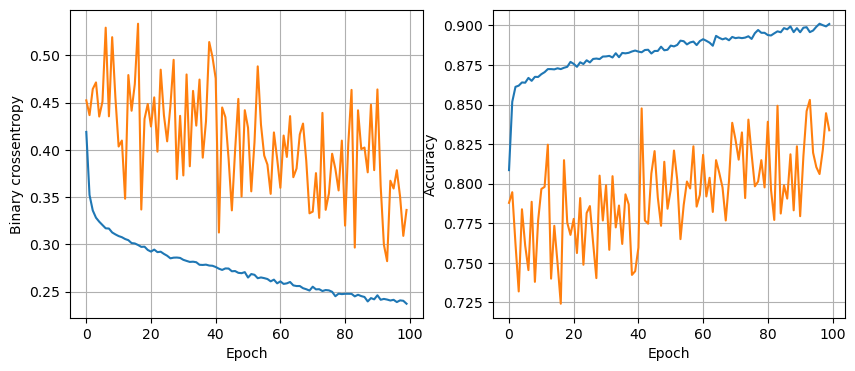

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 0.3477
num_nodes 32, dropout_prob 0, lr 0.005, batch_size 128


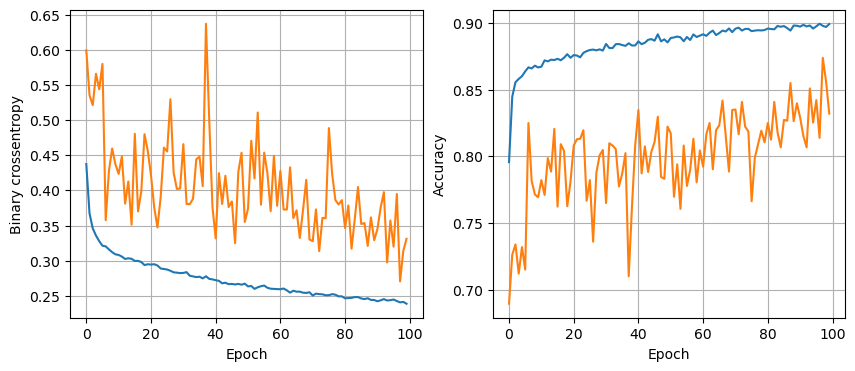

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8704 - loss: 0.3405
num_nodes 32, dropout_prob 0, lr 0.001, batch_size 32


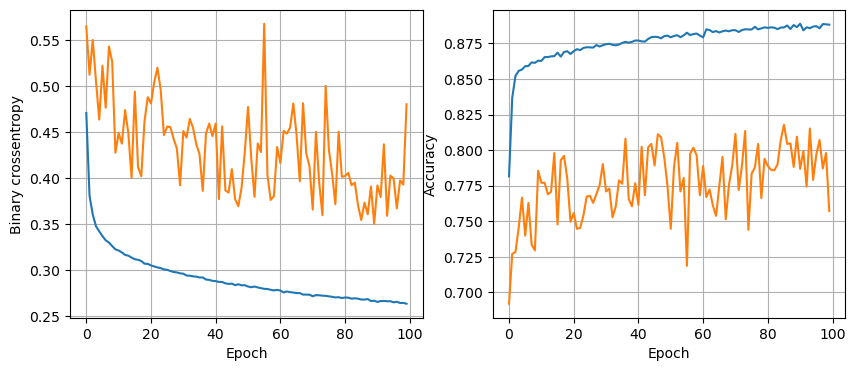

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.3180
num_nodes 32, dropout_prob 0, lr 0.001, batch_size 64


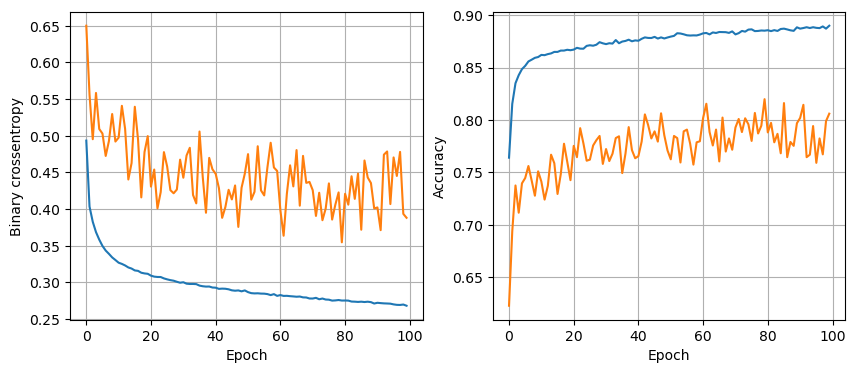

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8780 - loss: 0.3044
num_nodes 32, dropout_prob 0, lr 0.001, batch_size 128


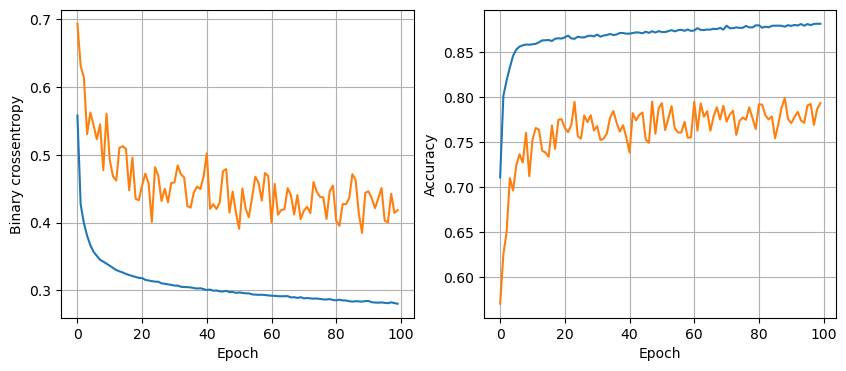

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.3063
num_nodes 32, dropout_prob 0.2, lr 0.1, batch_size 32


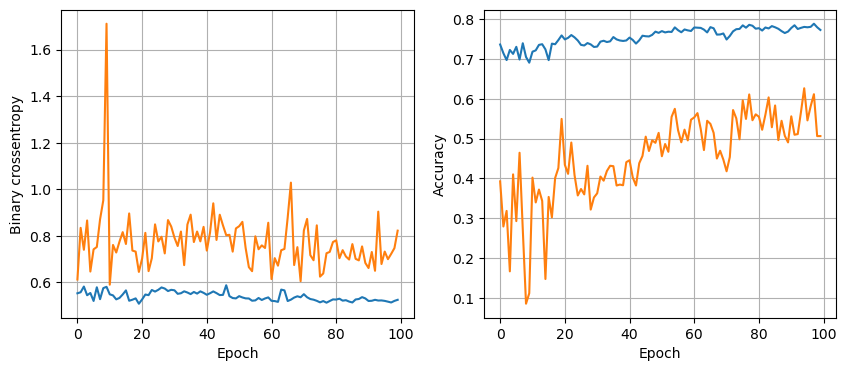

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.4808
num_nodes 32, dropout_prob 0.2, lr 0.1, batch_size 64


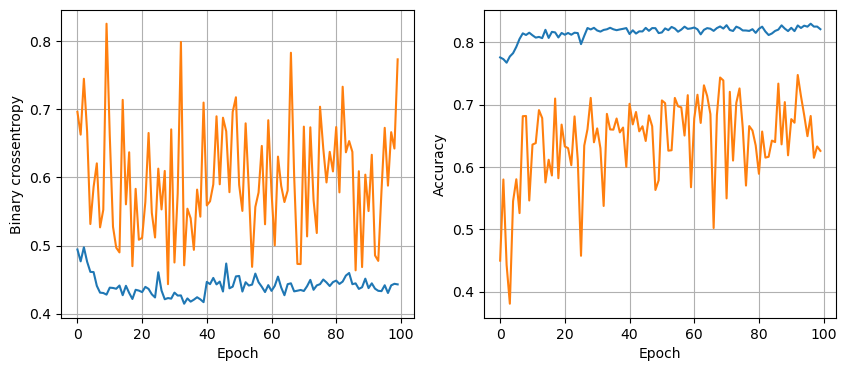

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8488 - loss: 0.4099
num_nodes 32, dropout_prob 0.2, lr 0.1, batch_size 128


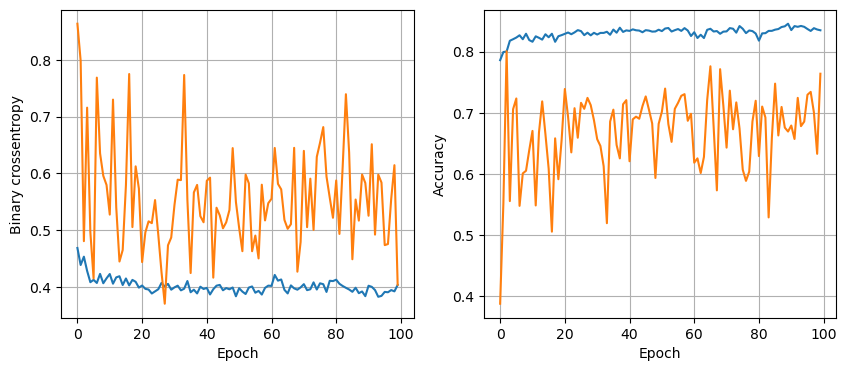

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8665 - loss: 0.3585
num_nodes 32, dropout_prob 0.2, lr 0.005, batch_size 32


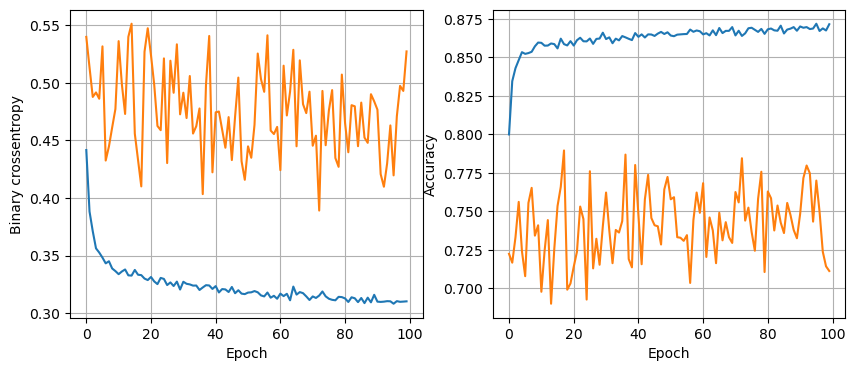

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8746 - loss: 0.3073
num_nodes 32, dropout_prob 0.2, lr 0.005, batch_size 64


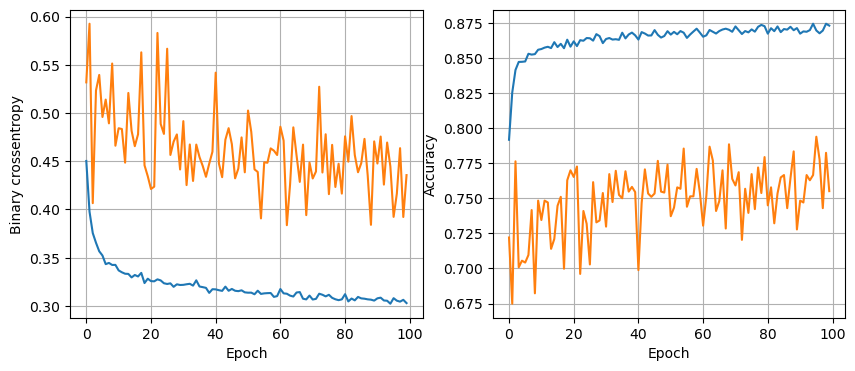

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3063
num_nodes 32, dropout_prob 0.2, lr 0.005, batch_size 128


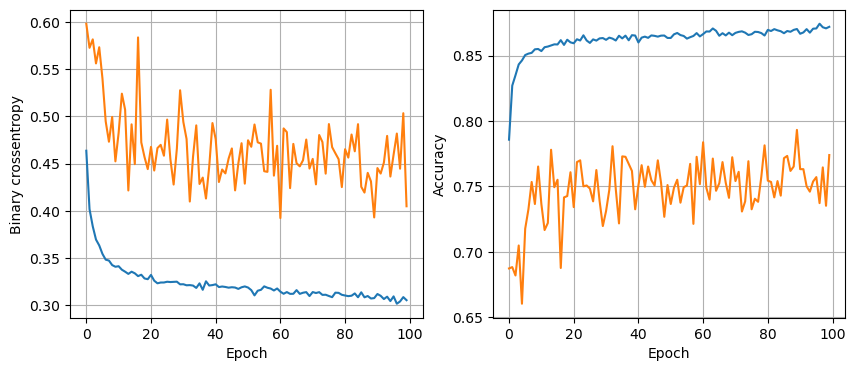

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8817 - loss: 0.3010
num_nodes 32, dropout_prob 0.2, lr 0.001, batch_size 32


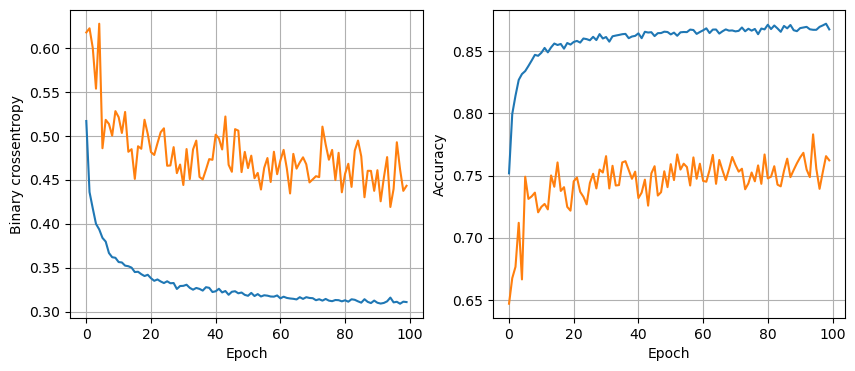

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.3003
num_nodes 32, dropout_prob 0.2, lr 0.001, batch_size 64


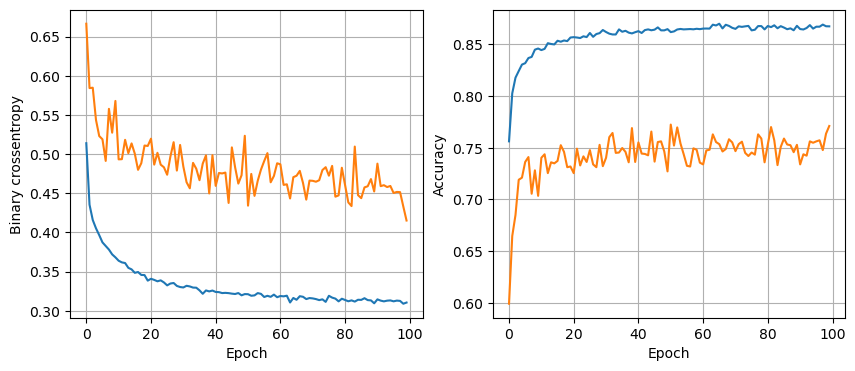

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8793 - loss: 0.3014
num_nodes 32, dropout_prob 0.2, lr 0.001, batch_size 128


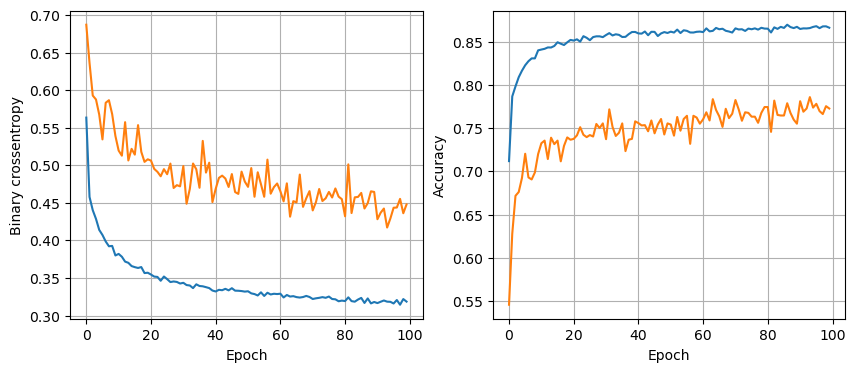

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8759 - loss: 0.3018
num_nodes 64, dropout_prob 0, lr 0.1, batch_size 32


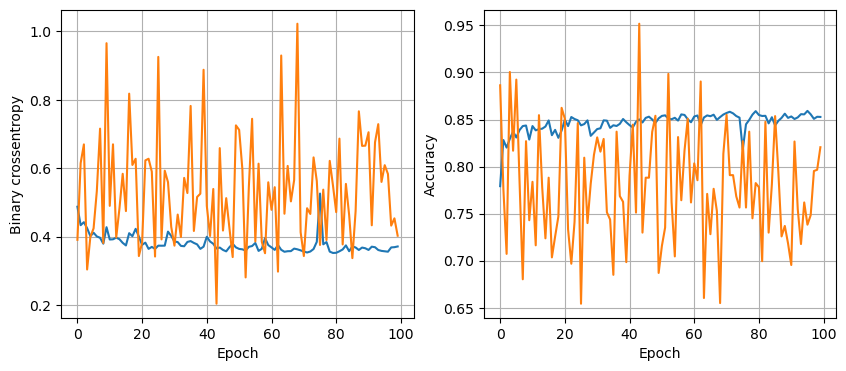

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8623 - loss: 0.3546
num_nodes 64, dropout_prob 0, lr 0.1, batch_size 64


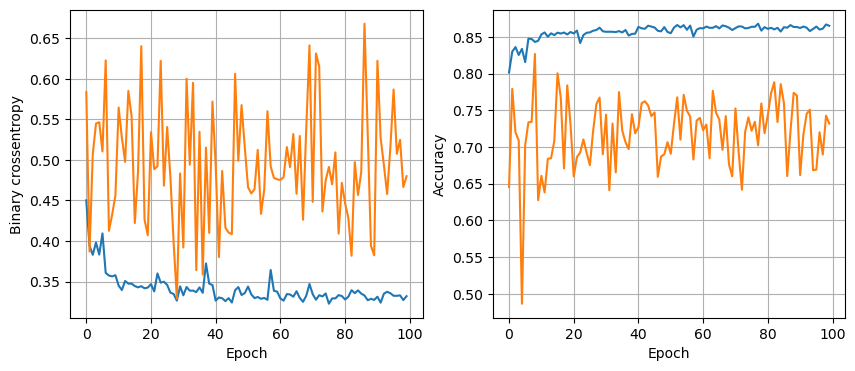

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3320
num_nodes 64, dropout_prob 0, lr 0.1, batch_size 128


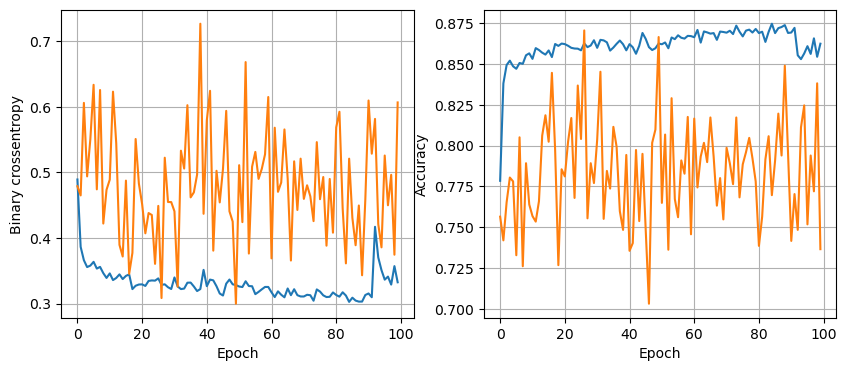

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8670 - loss: 0.3432
num_nodes 64, dropout_prob 0, lr 0.005, batch_size 32


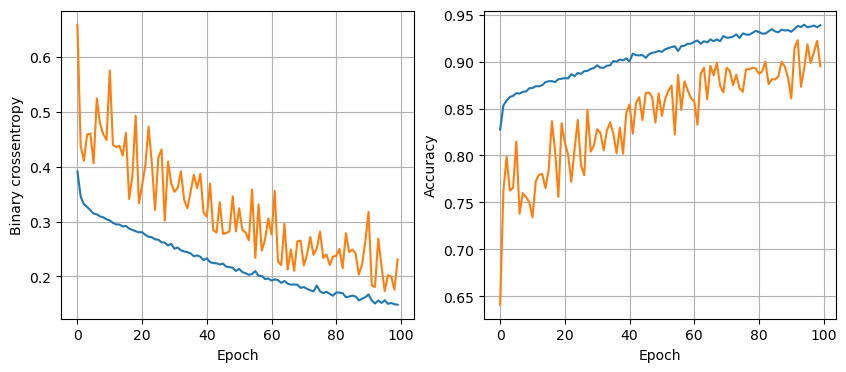

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.5874
num_nodes 64, dropout_prob 0, lr 0.005, batch_size 64


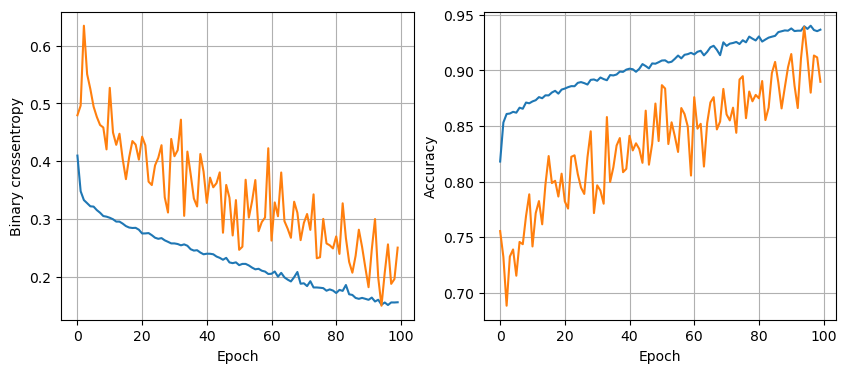

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.5474
num_nodes 64, dropout_prob 0, lr 0.005, batch_size 128


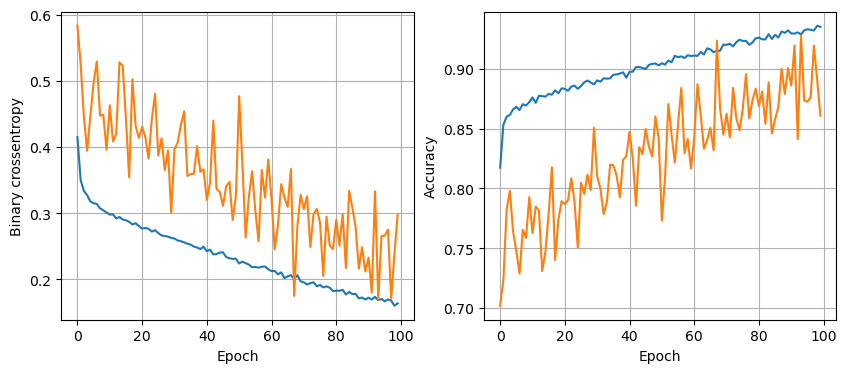

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.4642
num_nodes 64, dropout_prob 0, lr 0.001, batch_size 32


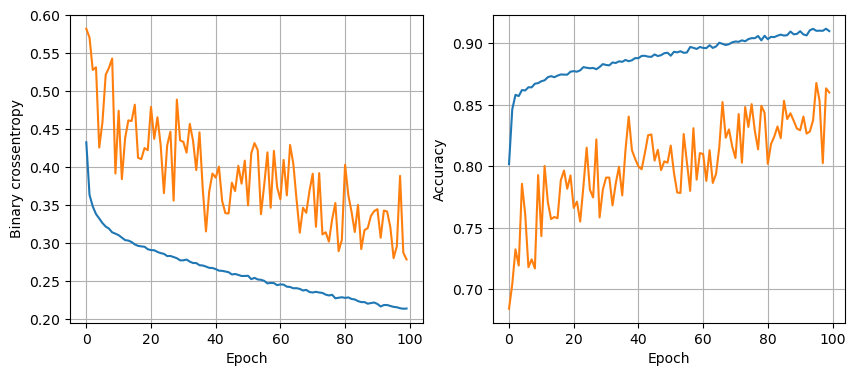

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8712 - loss: 0.3491
num_nodes 64, dropout_prob 0, lr 0.001, batch_size 64


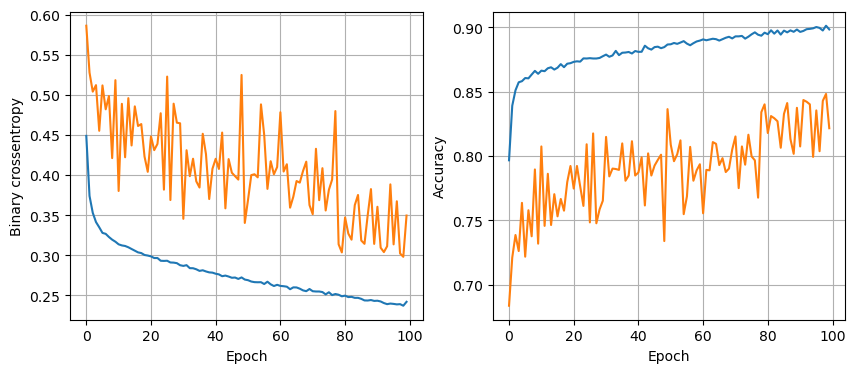

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8746 - loss: 0.3290
num_nodes 64, dropout_prob 0, lr 0.001, batch_size 128


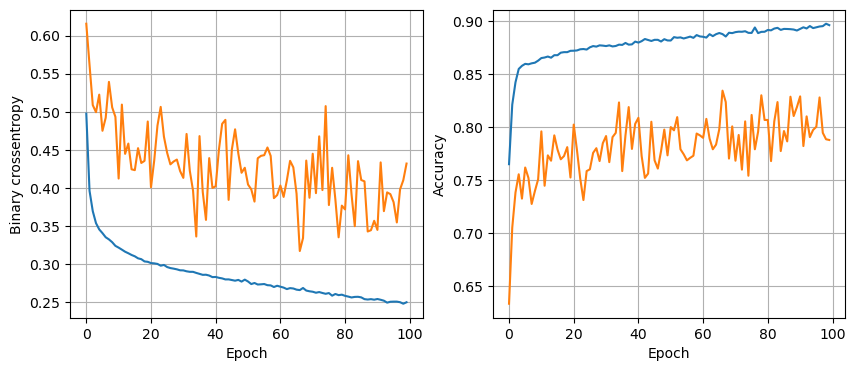

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8733 - loss: 0.3204
num_nodes 64, dropout_prob 0.2, lr 0.1, batch_size 32


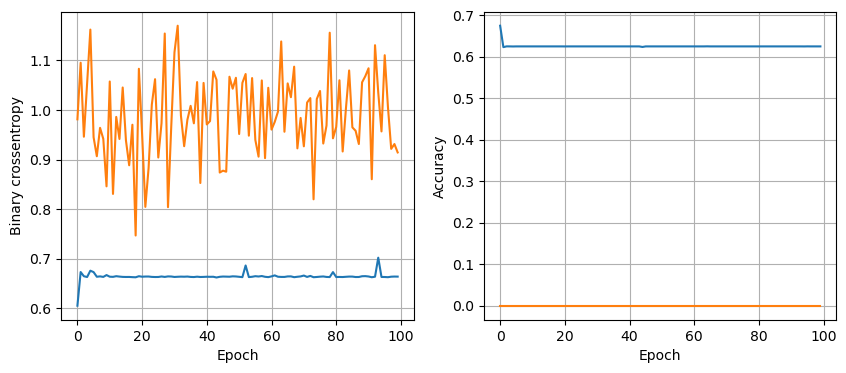

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6404 - loss: 0.6568
num_nodes 64, dropout_prob 0.2, lr 0.1, batch_size 64


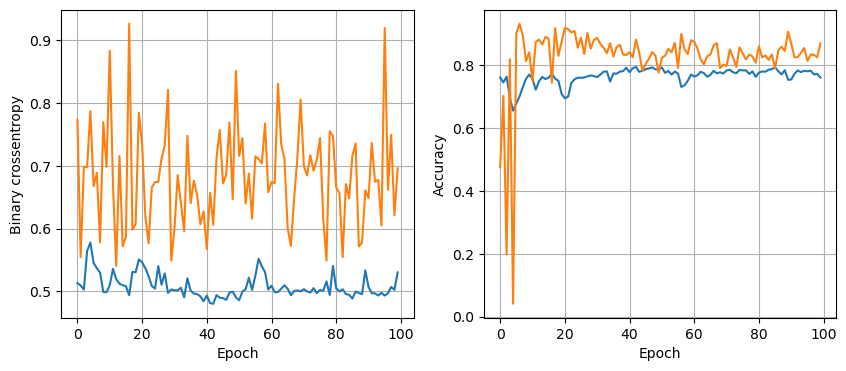

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4615
num_nodes 64, dropout_prob 0.2, lr 0.1, batch_size 128


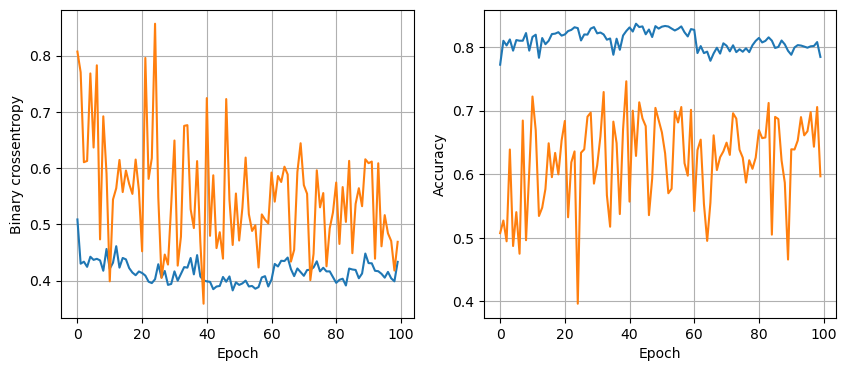

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.3849
num_nodes 64, dropout_prob 0.2, lr 0.005, batch_size 32


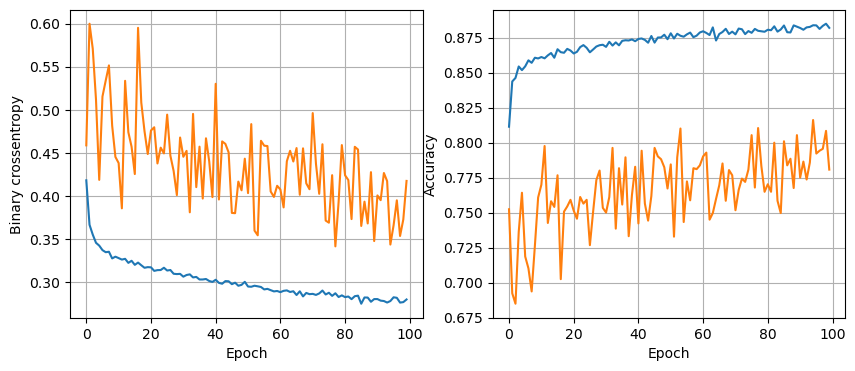

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8796 - loss: 0.3116
num_nodes 64, dropout_prob 0.2, lr 0.005, batch_size 64


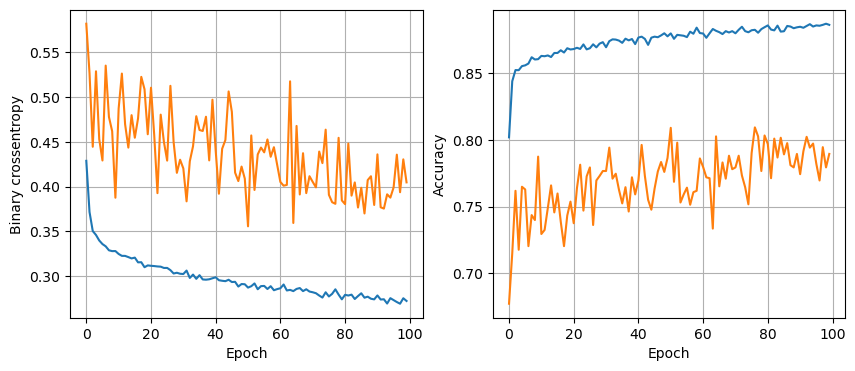

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8788 - loss: 0.3076
num_nodes 64, dropout_prob 0.2, lr 0.005, batch_size 128


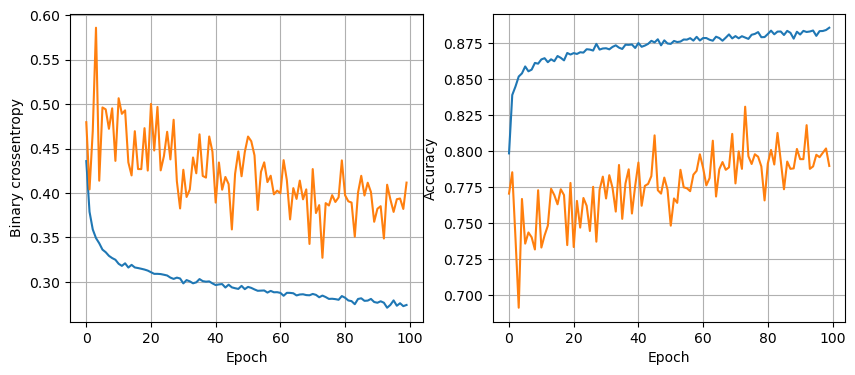

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.3041
num_nodes 64, dropout_prob 0.2, lr 0.001, batch_size 32


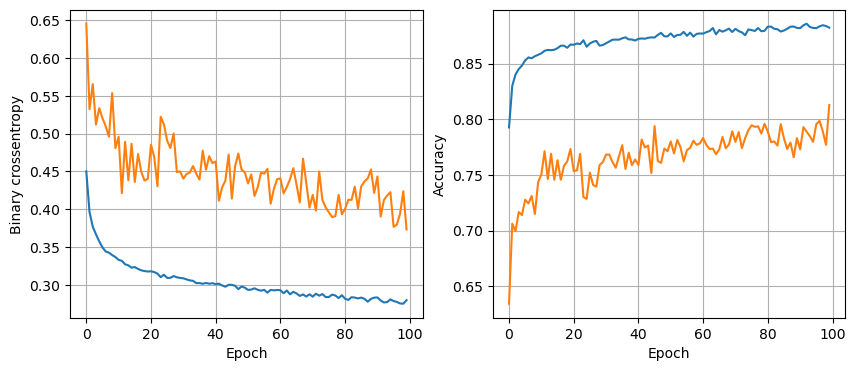

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8807 - loss: 0.2968
num_nodes 64, dropout_prob 0.2, lr 0.001, batch_size 64


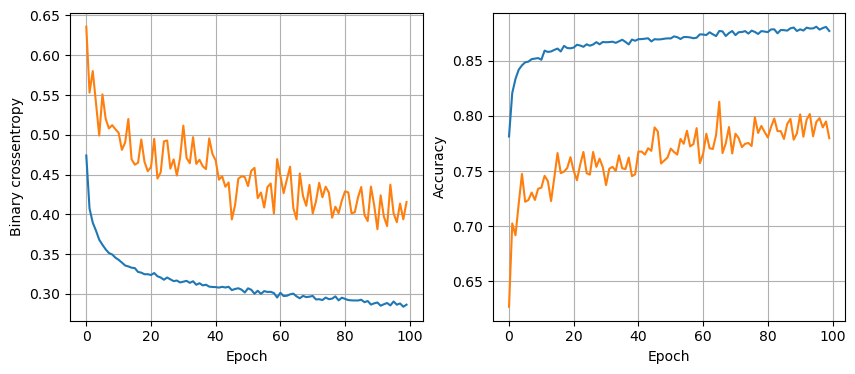

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8825 - loss: 0.2929
num_nodes 64, dropout_prob 0.2, lr 0.001, batch_size 128


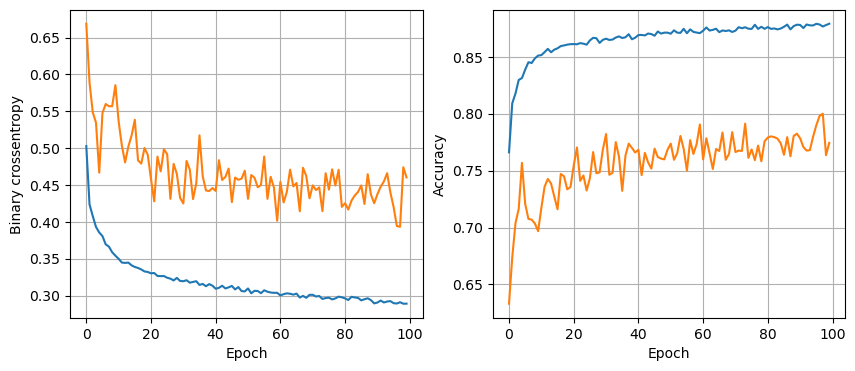

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8809 - loss: 0.2945


In [203]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"num_nodes {num_nodes}, dropout_prob {dropout_prob}, lr {lr}, batch_size {batch_size}", flush=True)
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                results = model.evaluate(x_valid, y_valid)
                val_loss = results[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [217]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1319
           1       0.88      0.94      0.91      2485

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

